In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model

In [2]:
dt = pd.read_excel('Covid 19 Death.xlsx')

# Death Analysis

In [3]:
dt.head(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_tests,new_tests,population
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0


## Finding null values

In [4]:
dt[dt['continent'].isnull()].index

Int64Index([  7624,   7625,   7626,   7627,   7628,   7629,   7630,   7631,
              7632,   7633,
            ...
            238260, 238261, 238262, 238263, 238264, 238265, 238266, 238267,
            238268, 238269],
           dtype='int64', length=14376)

## droping null values

In [5]:
dt = dt.drop(index=dt[dt['continent'].isnull()].index)

In [6]:
dt.head(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_tests,new_tests,population
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0


## replace nan values

In [7]:
dt = dt.replace(np.nan, 0)

In [8]:
dt.head(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_tests,new_tests,population
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0


## change data type of columns

In [9]:
dt.dtypes

iso_code                 object
continent                object
location                 object
date             datetime64[ns]
total_cases             float64
new_cases               float64
total_deaths            float64
new_deaths              float64
icu_patients            float64
hosp_patients           float64
total_tests             float64
new_tests               float64
population              float64
dtype: object

In [10]:
dt[["total_cases", "new_cases", "total_deaths", "new_deaths", "icu_patients", "hosp_patients", "total_tests", 
    "new_tests", "population"]]=dt[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'icu_patients', 
                                    'hosp_patients', 'total_tests', 'new_tests', 'population']].astype('int64')

In [11]:
dt.dtypes

iso_code                 object
continent                object
location                 object
date             datetime64[ns]
total_cases               int64
new_cases                 int64
total_deaths              int64
new_deaths                int64
icu_patients              int64
hosp_patients             int64
total_tests               int64
new_tests                 int64
population                int64
dtype: object

In [12]:
dt.head(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_tests,new_tests,population
0,AFG,Asia,Afghanistan,2020-02-24,5,5,0,0,0,0,0,0,41128772
1,AFG,Asia,Afghanistan,2020-02-25,5,0,0,0,0,0,0,0,41128772
2,AFG,Asia,Afghanistan,2020-02-26,5,0,0,0,0,0,0,0,41128772
3,AFG,Asia,Afghanistan,2020-02-27,5,0,0,0,0,0,0,0,41128772
4,AFG,Asia,Afghanistan,2020-02-28,5,0,0,0,0,0,0,0,41128772


# covid infection rate

In [13]:
ifr = dt.groupby(['continent','location', 'population'], as_index=False)['total_cases'].max()

In [14]:
ifr.head(5)

,continent,location,population,total_cases
0,Africa,Algeria,44903228,271403
1,Africa,Angola,35588996,105184
2,Africa,Benin,13352864,27990
3,Africa,Botswana,2630300,329494
4,Africa,Burkina Faso,22673764,22025


In [15]:
ifr['infection_rate'] = ifr['total_cases'] / ifr['population'] * 100

In [16]:
ifr.head(5)

,continent,location,population,total_cases,infection_rate
0,Africa,Algeria,44903228,271403,0.604418
1,Africa,Angola,35588996,105184,0.295552
2,Africa,Benin,13352864,27990,0.209618
3,Africa,Botswana,2630300,329494,12.526860
4,Africa,Burkina Faso,22673764,22025,0.097139


## round the infection rate with 2 decimal points

In [17]:
ifr = ifr.round({"infection_rate":2})

In [18]:
ifr.head(5)

,continent,location,population,total_cases,infection_rate
0,Africa,Algeria,44903228,271403,0.60
1,Africa,Angola,35588996,105184,0.30
2,Africa,Benin,13352864,27990,0.21
3,Africa,Botswana,2630300,329494,12.53
4,Africa,Burkina Faso,22673764,22025,0.10


## top 10 countries with highest infection rate

In [19]:
topifr = ifr.nlargest(n=10, columns=['infection_rate'])

In [20]:
topifr

,continent,location,population,total_cases,infection_rate
115,Europe,Cyprus,896007,644160,71.89
150,Europe,San Marino,33690,23468,69.66
120,Europe,Faeroe Islands,53117,34658,65.25
109,Europe,Austria,8939617,5812712,65.02
124,Europe,Gibraltar,32677,20399,62.43
154,Europe,Slovenia,2119843,1323146,62.42
62,Asia,Brunei,449002,276825,61.65
108,Europe,Andorra,79843,47850,59.93
192,North America,Saint Pierre and Miquelon,5885,3452,58.66
94,Asia,South Korea,51815808,30311979,58.50


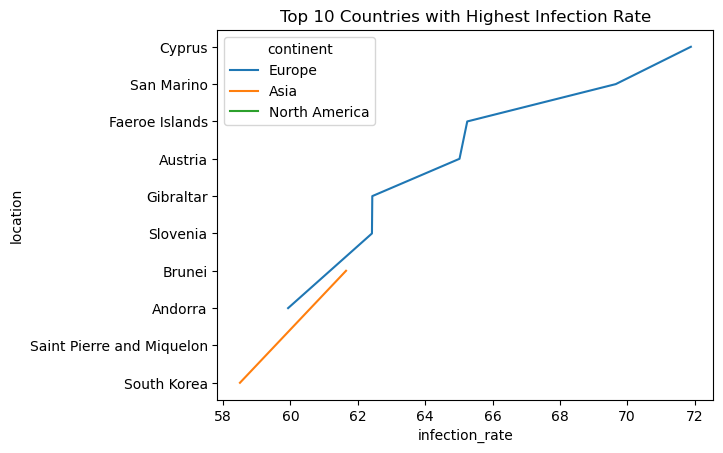

In [21]:
sns.lineplot(x='infection_rate', y='location', hue='continent', color='red', data=topifr)
plt.title('Top 10 Countries with Highest Infection Rate')
plt.show(1)

# covid death rate

In [22]:
dtr = dt.groupby(['continent','location', 'population'], as_index=False)[['total_cases','total_deaths']].max()

In [23]:
dtr.head(5)

,continent,location,population,total_cases,total_deaths
0,Africa,Algeria,44903228,271403,6881
1,Africa,Angola,35588996,105184,1931
2,Africa,Benin,13352864,27990,163
3,Africa,Botswana,2630300,329494,2876
4,Africa,Burkina Faso,22673764,22025,396


In [24]:
dtr["death_rate"] = dtr['total_deaths'] / dtr['total_cases'] * 100

In [25]:
dtr.head(5)

,continent,location,population,total_cases,total_deaths,death_rate
0,Africa,Algeria,44903228,271403,6881,2.535344
1,Africa,Angola,35588996,105184,1931,1.835831
2,Africa,Benin,13352864,27990,163,0.582351
3,Africa,Botswana,2630300,329494,2876,0.872854
4,Africa,Burkina Faso,22673764,22025,396,1.797957


## round the death rate with 2 decimal points

In [26]:
dtr = dtr.round({"death_rate":2})

In [27]:
dtr.head(5)

,continent,location,population,total_cases,total_deaths,death_rate
0,Africa,Algeria,44903228,271403,6881,2.54
1,Africa,Angola,35588996,105184,1931,1.84
2,Africa,Benin,13352864,27990,163,0.58
3,Africa,Botswana,2630300,329494,2876,0.87
4,Africa,Burkina Faso,22673764,22025,396,1.80


## top 10 countries with highest death rate

In [28]:
topdtr = dtr.nlargest(n=10, columns=['death_rate'])

In [29]:
topdtr

,continent,location,population,total_cases,total_deaths,death_rate
85,Asia,North Korea,26069416,1,6,600.00
106,Asia,Yemen,33696612,11945,2159,18.07
48,Africa,Sudan,46874200,63759,5008,7.85
96,Asia,Syria,22125242,57453,3164,5.51
45,Africa,Somalia,17597508,27322,1361,4.98
231,South America,Peru,34049588,4482852,219214,4.89
15,Africa,Egypt,110990096,515666,24807,4.81
185,North America,Mexico,127504120,7390902,332483,4.50
64,Asia,China,1425887360,2023904,87468,4.32
112,Europe,Bosnia and Herzegovina,3233530,401444,16260,4.05


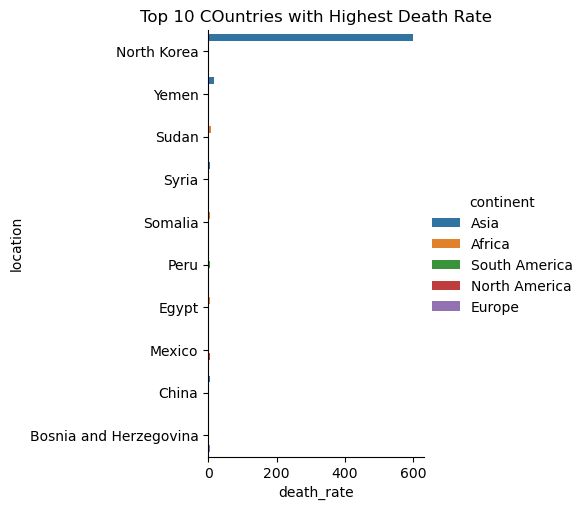

In [30]:
sns.catplot(x='death_rate', y='location', kind='bar', hue='continent', data=topdtr)
plt.title('Top 10 COuntries with Highest Death Rate')
plt.show(1)

## total tests done in ratio

In [31]:
tt = dt.groupby(['continent','location', 'population'], as_index = False)['total_tests'].max()

In [32]:
tt.head(5)

,continent,location,population,total_tests
0,Africa,Algeria,44903228,230553
1,Africa,Angola,35588996,1618566
2,Africa,Benin,13352864,604310
3,Africa,Botswana,2630300,2285160
4,Africa,Burkina Faso,22673764,324773


In [33]:
tt["test_ratio"] = tt['total_tests'] / tt['population']

In [34]:
tt.head(5)

,continent,location,population,total_tests,test_ratio
0,Africa,Algeria,44903228,230553,0.005134
1,Africa,Angola,35588996,1618566,0.045479
2,Africa,Benin,13352864,604310,0.045257
3,Africa,Botswana,2630300,2285160,0.868783
4,Africa,Burkina Faso,22673764,324773,0.014324


## round the test ratio with 2 decimal point

In [35]:
tt = tt.round({"test_ratio":2})

In [36]:
tt.head(5)

,continent,location,population,total_tests,test_ratio
0,Africa,Algeria,44903228,230553,0.01
1,Africa,Angola,35588996,1618566,0.05
2,Africa,Benin,13352864,604310,0.05
3,Africa,Botswana,2630300,2285160,0.87
4,Africa,Burkina Faso,22673764,324773,0.01


## top 10 countries with highest test ratio

In [37]:
toptt = tt.nlargest(n=10, columns='test_ratio')

In [38]:
toptt

,continent,location,population,total_tests,test_ratio
115,Europe,Cyprus,896007,29501771,32.93
109,Europe,Austria,8939617,189791719,21.23
103,Asia,United Arab Emirates,9441138,168522672,17.85
124,Europe,Gibraltar,32677,533268,16.32
120,Europe,Faeroe Islands,53117,777845,14.64
117,Europe,Denmark,5882259,64649913,10.99
153,Europe,Slovakia,5643455,51238482,9.08
125,Europe,Greece,10384972,84483362,8.14
159,Europe,United Kingdom,67508936,503270347,7.45
59,Asia,Bahrain,1472237,9969082,6.77


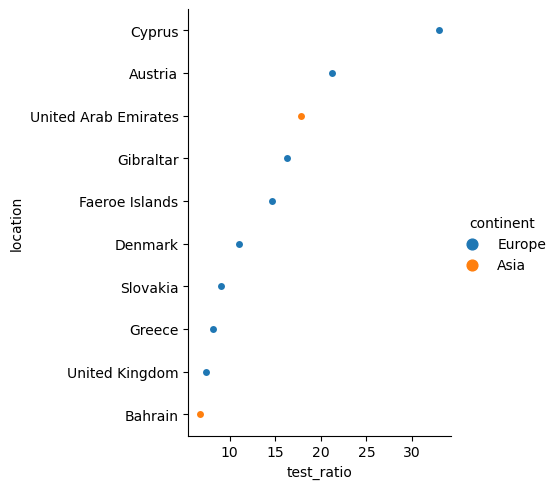

In [39]:
sns.catplot(x='test_ratio', y='location', kind='swarm',hue='continent', data=toptt)

# Vaccination Analysis

In [40]:
vc = pd.read_excel('Covid 19 Vaccination.xlsx')

In [41]:
vc.head(5)

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
0,DEU,Europe,Germany,2022-06-29,182944891.0,64740268.0,63392660.0,57099562.0,54614.0,83369840.0
1,DEU,Europe,Germany,2022-06-30,183006335.0,64741874.0,63395542.0,57156451.0,61444.0,83369840.0
2,DEU,Europe,Germany,2022-07-01,183042150.0,64743203.0,63397481.0,57188928.0,35815.0,83369840.0
3,DEU,Europe,Germany,2022-07-02,183052643.0,64743718.0,63398377.0,57197976.0,10493.0,83369840.0
4,DEU,Europe,Germany,2022-07-03,183055354.0,64743822.0,63398582.0,57200374.0,2711.0,83369840.0


## finding null values

In [42]:
vc[vc['continent'].isnull()].index

Int64Index([  5688,   5689,   5690,   5691,   5692,   5693,   5694,   5695,
              5696,   5697,
            ...
            254712, 254713, 254714, 254715, 254716, 254717, 254718, 254719,
            254720, 254721],
           dtype='int64', length=14376)

## drop null values

In [43]:
vc = vc.drop(index=vc[vc['continent'].isnull()].index)

In [44]:
vc.head(5)

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
0,DEU,Europe,Germany,2022-06-29,182944891.0,64740268.0,63392660.0,57099562.0,54614.0,83369840.0
1,DEU,Europe,Germany,2022-06-30,183006335.0,64741874.0,63395542.0,57156451.0,61444.0,83369840.0
2,DEU,Europe,Germany,2022-07-01,183042150.0,64743203.0,63397481.0,57188928.0,35815.0,83369840.0
3,DEU,Europe,Germany,2022-07-02,183052643.0,64743718.0,63398377.0,57197976.0,10493.0,83369840.0
4,DEU,Europe,Germany,2022-07-03,183055354.0,64743822.0,63398582.0,57200374.0,2711.0,83369840.0


## replace nan values

In [45]:
vc = vc.replace(np.nan, 0)

In [46]:
vc.head(5)

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
0,DEU,Europe,Germany,2022-06-29,182944891.0,64740268.0,63392660.0,57099562.0,54614.0,83369840.0
1,DEU,Europe,Germany,2022-06-30,183006335.0,64741874.0,63395542.0,57156451.0,61444.0,83369840.0
2,DEU,Europe,Germany,2022-07-01,183042150.0,64743203.0,63397481.0,57188928.0,35815.0,83369840.0
3,DEU,Europe,Germany,2022-07-02,183052643.0,64743718.0,63398377.0,57197976.0,10493.0,83369840.0
4,DEU,Europe,Germany,2022-07-03,183055354.0,64743822.0,63398582.0,57200374.0,2711.0,83369840.0


## change data of columns

In [47]:
vc.dtypes

iso_code                           object
continent                          object
location                           object
date                       datetime64[ns]
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
total_boosters                    float64
new_vaccinations                  float64
population                        float64
dtype: object

In [48]:
vc[["total_vaccinations", "people_vaccinated", "people_fully_vaccinated", 
    "total_boosters", "new_vaccinations", "population"]] = vc[['total_vaccinations', 'people_vaccinated',
                                                               'people_fully_vaccinated', 
                                                               'total_boosters', 
                                                               'new_vaccinations', 'population']].astype('int64')

In [49]:
vc.dtypes

iso_code                           object
continent                          object
location                           object
date                       datetime64[ns]
total_vaccinations                  int64
people_vaccinated                   int64
people_fully_vaccinated             int64
total_boosters                      int64
new_vaccinations                    int64
population                          int64
dtype: object

In [50]:
vc.head(5)

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
0,DEU,Europe,Germany,2022-06-29,182944891,64740268,63392660,57099562,54614,83369840
1,DEU,Europe,Germany,2022-06-30,183006335,64741874,63395542,57156451,61444,83369840
2,DEU,Europe,Germany,2022-07-01,183042150,64743203,63397481,57188928,35815,83369840
3,DEU,Europe,Germany,2022-07-02,183052643,64743718,63398377,57197976,10493,83369840
4,DEU,Europe,Germany,2022-07-03,183055354,64743822,63398582,57200374,2711,83369840


## covid ratio of people vaccinated vs people fully vaccinated vs total booster

In [51]:
cvr = vc.groupby(['continent','location', 'population'], as_index=False)[['people_vaccinated', 'people_fully_vaccinated', 'total_boosters']].max()

In [52]:
cvr.head(5)

,continent,location,population,people_vaccinated,people_fully_vaccinated,total_boosters
0,Africa,Algeria,44903228,7840131,6481186,575651
1,Africa,Angola,35588996,15079129,8306664,1526098
2,Africa,Benin,13352864,3697190,2742837,0
3,Africa,Botswana,2630300,1691984,1427883,502795
4,Africa,Burkina Faso,22673764,4366726,3335753,0


In [53]:
cvr['vaccination rate'] = cvr['people_vaccinated'] / cvr['population']*100
cvr['fully vaccinated'] = cvr['people_fully_vaccinated'] / cvr['population']*100
cvr['take booster'] = cvr['total_boosters'] / cvr['population']*100

In [54]:
cvr.head(5)

,continent,location,population,people_vaccinated,people_fully_vaccinated,total_boosters,vaccination rate,fully vaccinated,take booster
0,Africa,Algeria,44903228,7840131,6481186,575651,17.460061,14.433675,1.281981
1,Africa,Angola,35588996,15079129,8306664,1526098,42.370201,23.340540,4.288118
2,Africa,Benin,13352864,3697190,2742837,0,27.688367,20.541189,0.000000
3,Africa,Botswana,2630300,1691984,1427883,502795,64.326655,54.285937,19.115500
4,Africa,Burkina Faso,22673764,4366726,3335753,0,19.258937,14.711951,0.000000


## round the vaccination rate with 2 decimal point

In [55]:
cvr = cvr.round({'vaccination rate':2,
                'fully vaccinated':2,
                 'take booster':2
                })

In [56]:
cvr.head(5)

,continent,location,population,people_vaccinated,people_fully_vaccinated,total_boosters,vaccination rate,fully vaccinated,take booster
0,Africa,Algeria,44903228,7840131,6481186,575651,17.46,14.43,1.28
1,Africa,Angola,35588996,15079129,8306664,1526098,42.37,23.34,4.29
2,Africa,Benin,13352864,3697190,2742837,0,27.69,20.54,0.00
3,Africa,Botswana,2630300,1691984,1427883,502795,64.33,54.29,19.12
4,Africa,Burkina Faso,22673764,4366726,3335753,0,19.26,14.71,0.00


## top 10 countries with highest vaccination rate

In [57]:
topvr = cvr.nlargest(n=10, columns = 'vaccination rate')

In [58]:
topvr

,continent,location,population,people_vaccinated,people_fully_vaccinated,total_boosters,vaccination rate,fully vaccinated,take booster
124,Europe,Gibraltar,32677,42175,41465,49170,129.07,126.89,150.47
217,Oceania,Tokelau,1893,2203,2203,968,116.38,116.38,51.14
103,Asia,United Arab Emirates,9441138,9991089,9792266,5138699,105.83,103.72,54.43
91,Asia,Qatar,2695131,2851272,2851271,1902912,105.79,105.79,70.61
62,Asia,Brunei,449002,450788,446323,339711,100.40,99.40,75.66
214,Oceania,Pitcairn,47,47,47,23,100.00,100.00,48.94
79,Asia,Macao,695180,678421,640491,476363,97.59,92.13,68.52
174,North America,Cuba,11212198,10725298,10007149,8694346,95.66,89.25,77.54
147,Europe,Portugal,10270857,9777719,8891728,7040000,95.20,86.57,68.54
66,Asia,Hong Kong,7488863,6912485,6793089,6912067,92.30,90.71,92.30


Text(0.5, 1.0, 'Vaccination Rate')

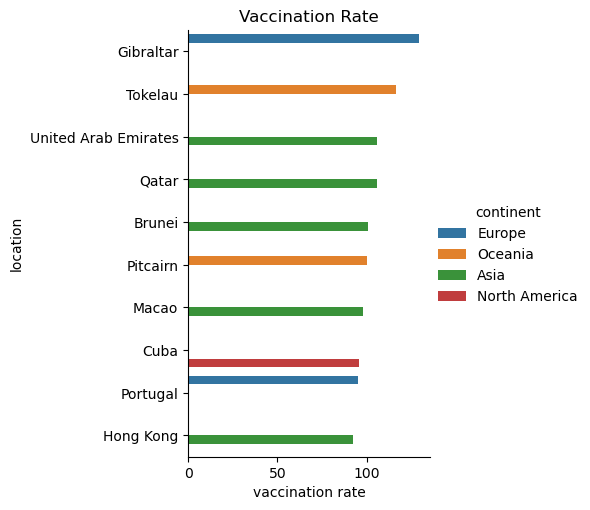

In [59]:
sns.catplot(x='vaccination rate', y='location',kind = 'bar',hue = 'continent', data=topvr)
plt.title('Vaccination Rate')

## top 10 countries with highest people fully vaccinated

In [60]:
toppfv = cvr.nlargest(n=10, columns = 'fully vaccinated')

In [61]:
toppfv

,continent,location,population,people_vaccinated,people_fully_vaccinated,total_boosters,vaccination rate,fully vaccinated,take booster
124,Europe,Gibraltar,32677,42175,41465,49170,129.07,126.89,150.47
217,Oceania,Tokelau,1893,2203,2203,968,116.38,116.38,51.14
91,Asia,Qatar,2695131,2851272,2851271,1902912,105.79,105.79,70.61
103,Asia,United Arab Emirates,9441138,9991089,9792266,5138699,105.83,103.72,54.43
214,Oceania,Pitcairn,47,47,47,23,100.00,100.00,48.94
62,Asia,Brunei,449002,450788,446323,339711,100.40,99.40,75.66
79,Asia,Macao,695180,678421,640491,476363,97.59,92.13,68.52
93,Asia,Singapore,5637022,5160551,5120969,4440289,91.55,90.85,78.77
66,Asia,Hong Kong,7488863,6912485,6793089,6912067,92.30,90.71,92.30
225,South America,Chile,19603736,18088517,17700117,27474929,92.27,90.29,140.15


Text(0.5, 1.0, 'Fully Vaccinated')

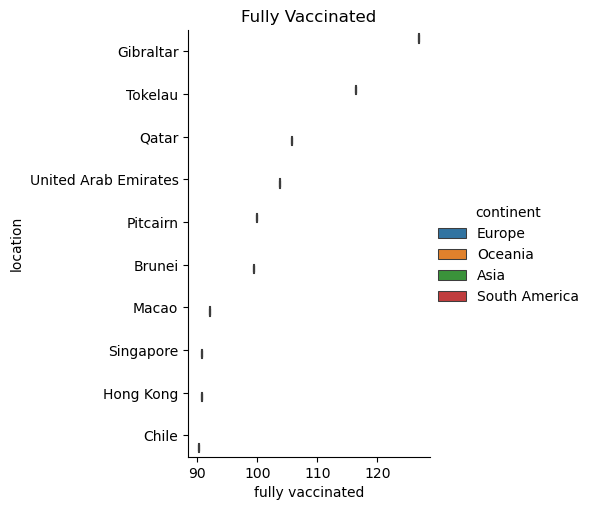

In [62]:
sns.catplot(x='fully vaccinated', y='location', hue='continent', kind='box', data=toppfv)
plt.title('Fully Vaccinated')

## top 10 countries with highest total boosters

In [63]:
topb= cvr.nlargest(n=10, columns = 'take booster')

In [64]:
topb

,continent,location,population,people_vaccinated,people_fully_vaccinated,total_boosters,vaccination rate,fully vaccinated,take booster
124,Europe,Gibraltar,32677,42175,41465,49170,129.07,126.89,150.47
225,South America,Chile,19603736,18088517,17700117,27474929,92.27,90.29,140.15
72,Asia,Japan,123951696,104640998,103273937,172408505,84.42,83.32,139.09
118,Europe,England,56550000,45398149,42916983,64062268,80.28,75.89,113.28
126,Europe,Guernsey,63329,54223,52710,69339,85.62,83.23,109.49
97,Asia,Taiwan,23893396,21859305,20705041,24112605,91.49,86.66,100.92
111,Europe,Belgium,11655923,9265134,9167544,11612338,79.49,78.65,99.63
156,Europe,Sweden,10549349,7817893,7635229,9867336,74.11,72.38,93.54
66,Asia,Hong Kong,7488863,6912485,6793089,6912067,92.30,90.71,92.30
233,South America,Uruguay,3422796,3005984,2898215,3018550,87.82,84.67,88.19


Text(0.5, 1.0, 'Total Boosters')

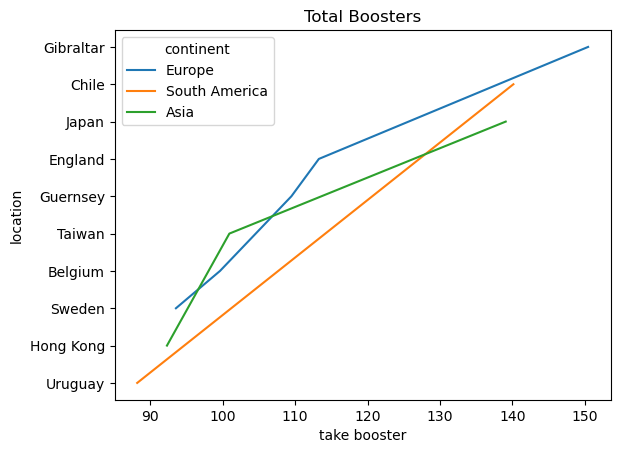

In [65]:
sns.lineplot(x='take booster',y='location', hue='continent', color='red', data=topb)
plt.title('Total Boosters')